In [11]:
from matplotlib import pyplot as plt
import config
import pandas as pd
import os.path

pd.set_option("display.width", 2000)


def get_line_label(algorithm, dataset, unique_datasets):
    return (
        f"{algorithm} ({os.path.splitext(os.path.basename(dataset))[0]})"
        if len(unique_datasets) > 1
        else algorithm
    )


def enumerate_algorithm_scores(
    df: pd.DataFrame, algorithms: list[str], experiment: str
):
    exp_df = df[df["experiment"] == experiment]
    unique_datasets = exp_df["dataset"].unique()
    for dataset in unique_datasets:
        exp_dataset_df = exp_df[exp_df["dataset"] == dataset]
        for algorithm in algorithms:
            yield (
                exp_dataset_df[experiment],
                exp_dataset_df[algorithm],
                get_line_label(algorithm, dataset, unique_datasets),
            )


def plot_K(df, algorithms):
    plt.figure(figsize=(2 ^ 4, (3 * (2 ^ 4)) / 4))
    for X, y, label in enumerate_algorithm_scores(df, algorithms, "max_path_length"):
        plt.xticks(X)
        plt.plot(
            X,
            y / 60,
            label=label,
        )
    plt.xlabel("K")
    plt.ylabel("run-time [h]")
    plt.legend(loc="upper right")
    plt.title(
        "Run-time of three causal path finding algorithms for varying max path lengths"
    )

    plt.tight_layout()
    plt.show()


def plot_N(df, algorithms):
    plt.figure(figsize=(2 ^ 4, (3 * (2 ^ 4)) / 4))
    for X, y, label in enumerate_algorithm_scores(df, algorithms, "sorted_edges"):
        plt.plot(
            X,
            y / 60,
            label=label,
        )
    plt.xlabel("N")
    plt.ylabel("run-time [h]")
    plt.legend(loc="upper right")
    plt.title(
        "Run-time of three causal path finding algorithms for varying network size"
    )

    plt.tight_layout()
    plt.show()


def plot_dt(df: pd.DataFrame, algorithms):
    plt.figure(figsize=(2 ^ 4, (3 * (2 ^ 4)) / 4))
    for X, y, label in enumerate_algorithm_scores(df, algorithms, "delta_time"):
        plt.plot(
            X,
            y / 60,
            label=label,
        )
    plt.xlabel("delta_time [avg timestep count]")
    plt.ylabel("run-time [h]")
    plt.legend(loc="upper left")
    plt.title("Run-time of Paco and Modified Paco for Varying Delta Time\non Two Datasets")

    plt.tight_layout()
    plt.show()


def plot_all(df, selected_algorithms=None):
    selected_algorithms = (
        [algorithm for algorithm, _ in config.algorithms if algorithm in df]
        if selected_algorithms is None
        else selected_algorithms
    )
    plot_K(df, selected_algorithms)
    plot_N(df, selected_algorithms)
    plot_dt(df, selected_algorithms)

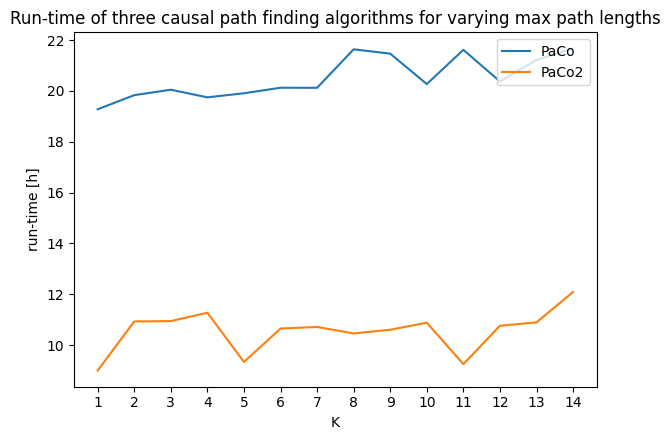

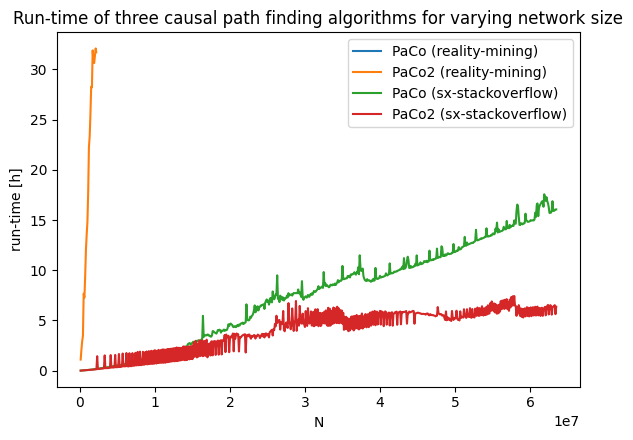

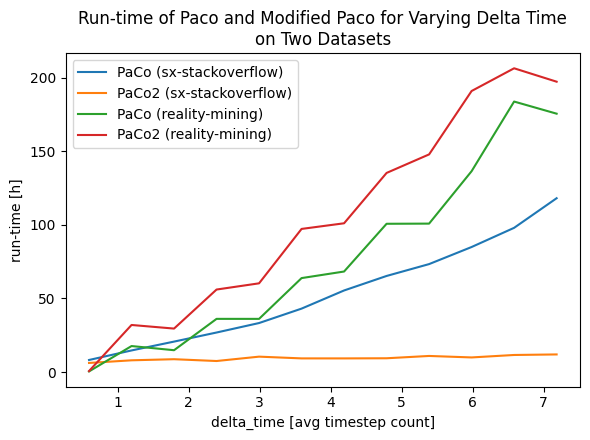

In [13]:
import os
import pandas as pd
from functools import reduce

results_dir = "results"

# Combine experiment results to a dataframe where all algorithm scores get their own column
# we could do this with pandas merge_columns in the future, but now we create a dictionary
# containing a dataframe per experiment/dataset combination, so we can safely append the algorithm
# score (assuming that experiments test consistent parameters)
def read_result_csvs():
    results = {}
    for result_file in os.listdir(results_dir):
        if ".progress" not in result_file:
            filename = os.path.splitext(result_file)[0]
            [experiment, algorithm, dataset] = filename.split("|")
            experiment_result_df = pd.read_csv(f"{results_dir}/{result_file}")
            experiment_result_df["dataset"] = dataset
            df = results.get((dataset, experiment), experiment_result_df)
            df[algorithm] = experiment_result_df[algorithm]
            results[(dataset, experiment)] = df
    return reduce(lambda a, b: pd.concat([a,b]), results.values())


results_df = read_result_csvs()
plot_all(results_df)